# Assignment 9: Advanced Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("fraserDataWithRGDPPC.csv",
                  index_col = ["ISO_Code_3", "Year"],
                  parse_dates = True).rename(columns = {"Summary":"EFW"})
data.tail()

C:\Users\tazee\AppData\Local\Temp\ipykernel_11980\3579266558.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("fraserDataWithRGDPPC.csv",


ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
ZWE        2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   
           2019-01-01         ZW  Sub-Saharan Africa   
           2020-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
ZWE        2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     
           2019-01-01                                                 LM                                                                                     
           2020-01-01                                                 LM                                                                                     

                      Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
ZWE        2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   
           2019-01-01  Zimbabwe  4.719465            5.628359   
           2020-01-01  Zimbabwe  4.480000            5.562008   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
ZWE        2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   
           2019-01-01                          4.026568     1.413372   
           2020-01-01                          3.965267     1.250000   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
ZWE        2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   
           2019-01-01                          6.397045    6.132583   
           2020-01-01                          5.565207    6.080774   

                       Standard Deviation of the 5 EFW Areas  RGDP Per Capita  
ISO_Code_3 Year                                                                
ZWE        2016-01-01                               1.498126        1534.0000  
           2017-01-01                               1.631512        1582.3662  
           2018-01-01                               1.262218        1611.4052  
           2019-01-01                               2.064439              NaN  
           2020-01-01                               1.975388              NaN

## Constructing Lagged Observations

In [14]:
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code_3")["RGDP Per Capita"].shift()
data.loc["USA"].head()

,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,EFW,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Standard Deviation of the 5 EFW Areas,RGDP Per Capita,North America,RGDP Per Capita 5-tile,RGDP Per Capita Lag
Year,,,,,,,,,,,,,,,
1970-01-01,US,North America,NaN,United States,7.615181,5.341231,8.286741,9.588817,8.232334,6.631262,1.648185,23958.0,1,1.0,NaN
1975-01-01,US,North America,NaN,United States,7.907324,5.336851,8.670280,9.067438,8.412407,8.042706,1.483975,25956.0,1,1.0,23958.0
1980-01-01,US,North America,NaN,United States,8.101368,5.788734,8.684269,9.122306,8.544966,8.359863,1.322304,29611.0,1,1.0,25956.0
1985-01-01,US,North America,NaN,United States,8.295413,6.582616,8.726823,9.339660,8.505198,8.335644,1.031484,33023.0,1,1.0,29611.0
1990-01-01,US,North America,H,United States,8.461126,7.262163,8.350956,9.669842,8.537828,8.477998,0.853932,36982.0,1,1.0,33023.0


Data
Entity = True
Time = True
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.1159
Estimator:                   PanelOLS   R-squared (Between):              0.6360
No. Observations:                2577   R-squared (Within):               0.1316
Date:                Thu, Apr 25 2024   R-squared (Overall):              0.6379
Time:                        13:58:54   Log-likelihood                   -924.46
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      52.462
Entities:                         153   P-value                           0.0000
Avg Obs:                       16.843   Distribution:                  F(6,2400)
Min Obs:                       2.0000                                           
Max Obs:                       19.000   F-statistic (robust):            

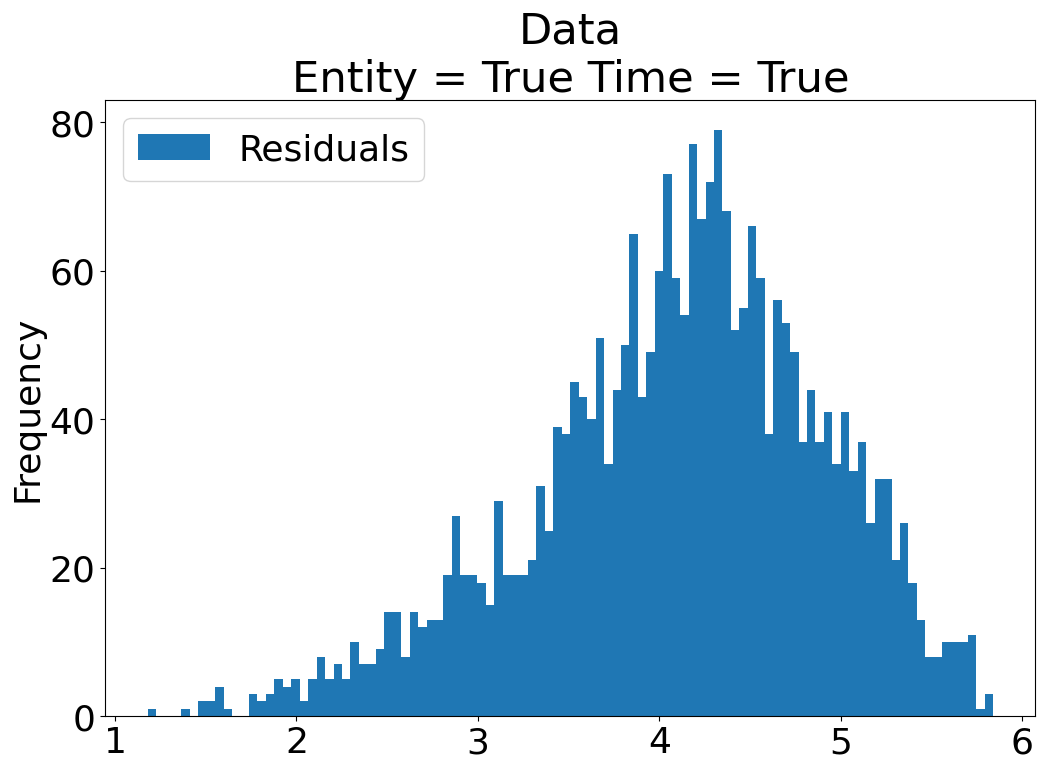

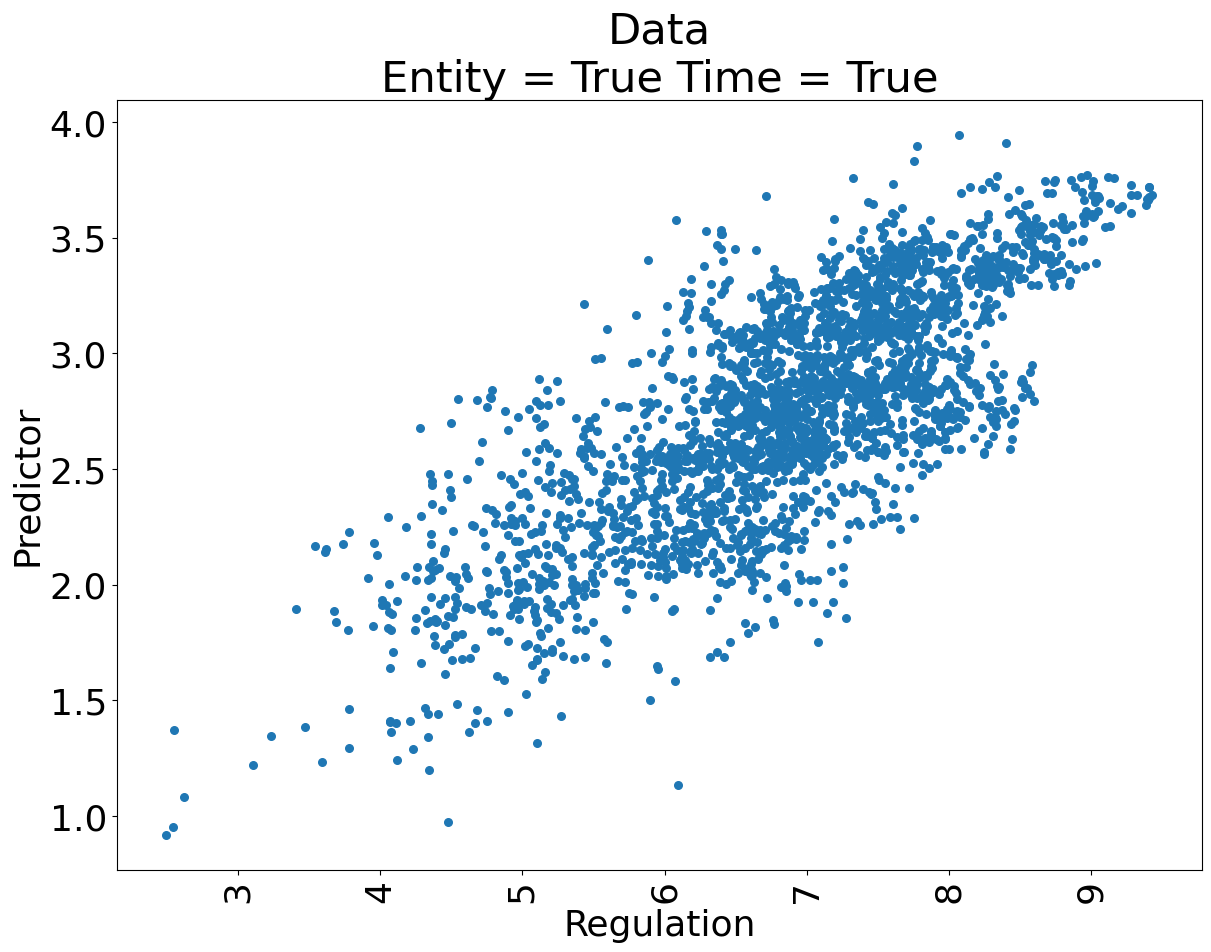

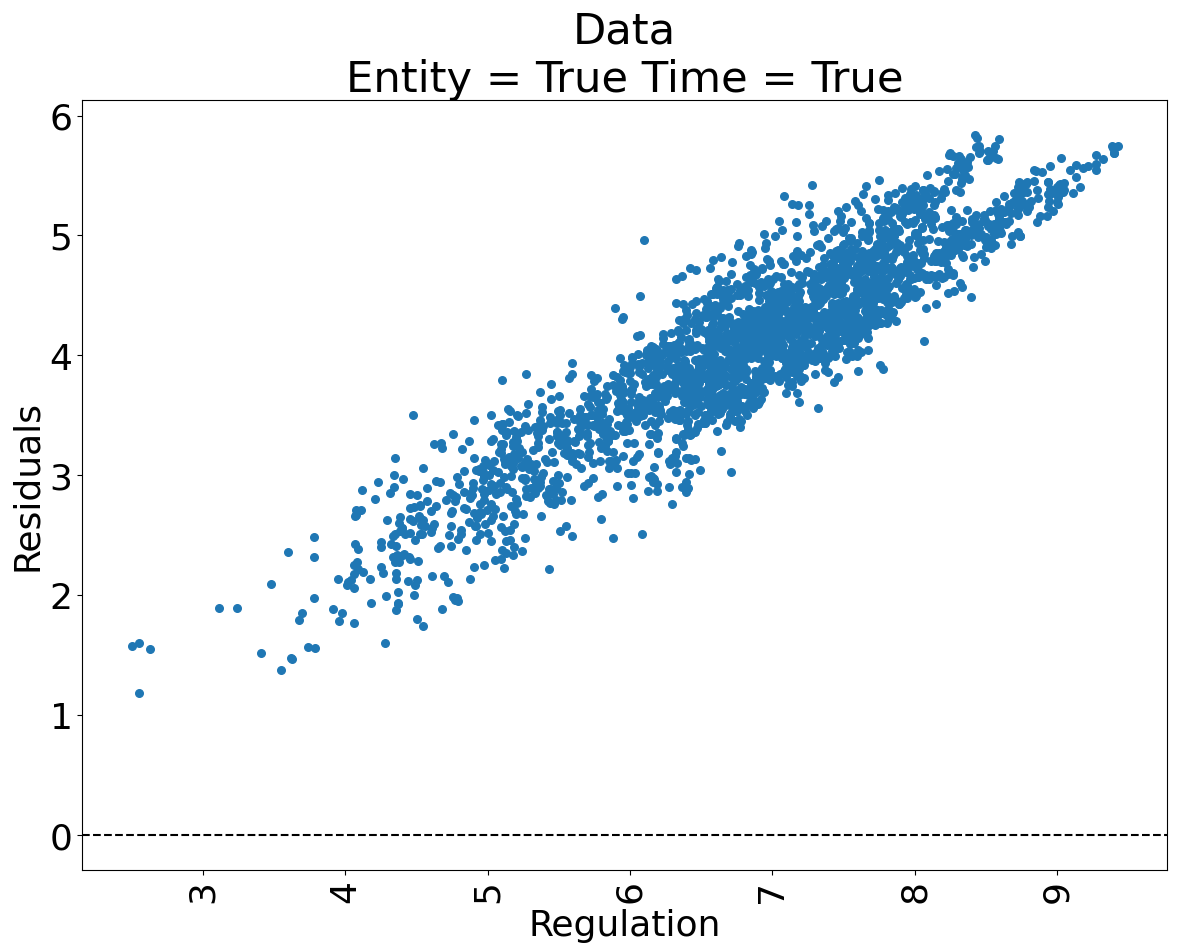

Data
Entity = True
Time = False
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.1785
Estimator:                   PanelOLS   R-squared (Between):              0.8121
No. Observations:                2577   R-squared (Within):               0.1785
Date:                Thu, Apr 25 2024   R-squared (Overall):              0.8138
Time:                        13:58:56   Log-likelihood                   -1118.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      87.567
Entities:                         153   P-value                           0.0000
Avg Obs:                       16.843   Distribution:                  F(6,2418)
Min Obs:                       2.0000                                           
Max Obs:                       19.000   F-statistic (robust):           

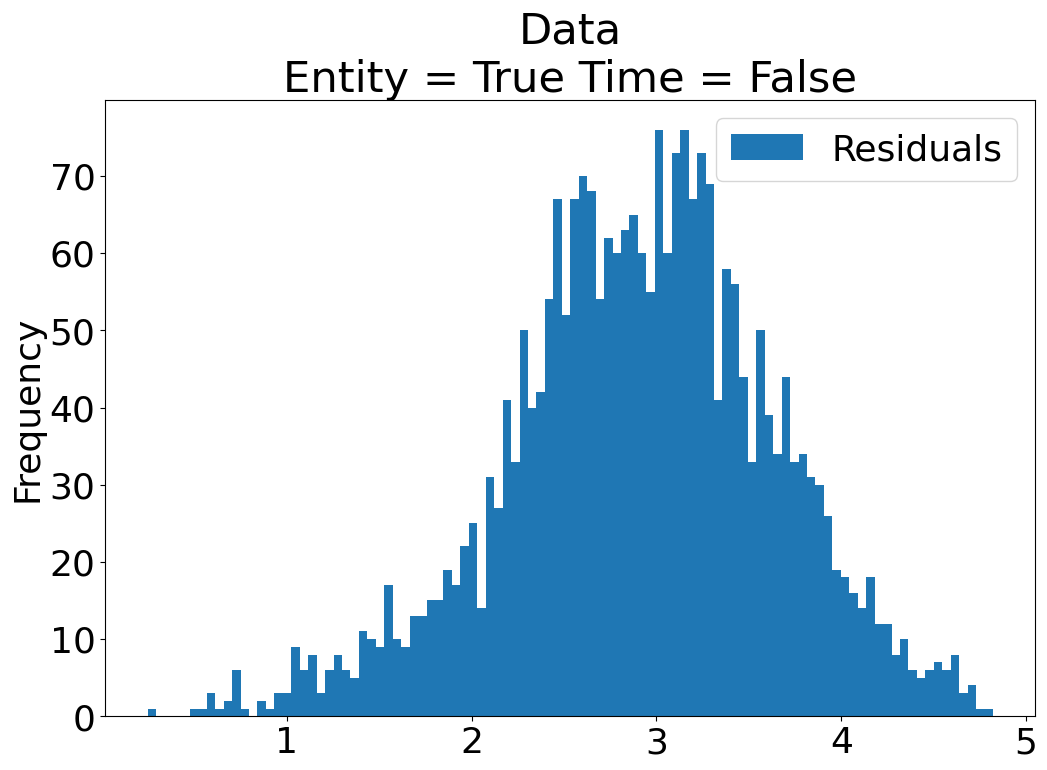

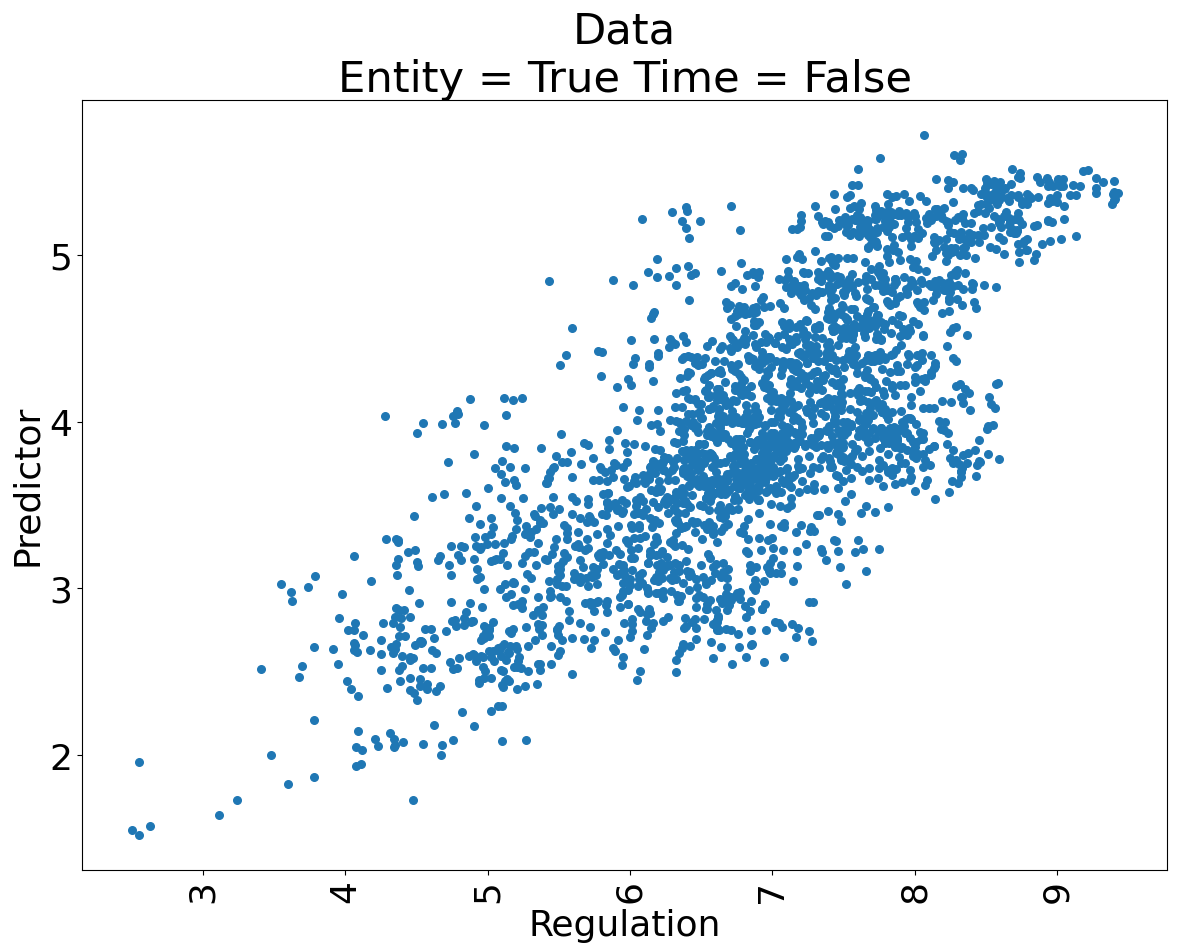

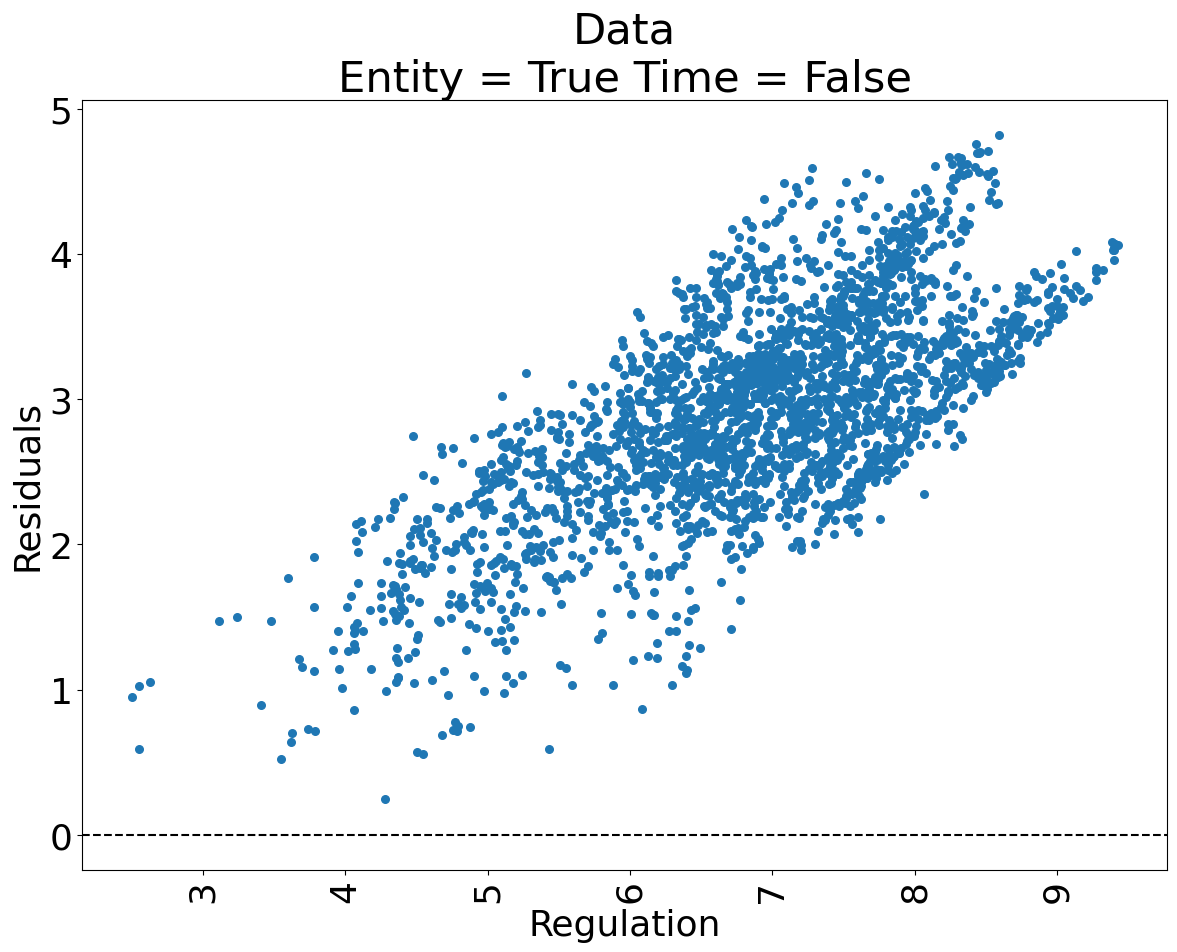

Data
Entity = False
Time = True
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.6056
Estimator:                   PanelOLS   R-squared (Between):              0.8761
No. Observations:                2577   R-squared (Within):               0.1052
Date:                Thu, Apr 25 2024   R-squared (Overall):              0.8774
Time:                        13:58:57   Log-likelihood                   -2729.4
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      653.17
Entities:                         153   P-value                           0.0000
Avg Obs:                       16.843   Distribution:                  F(6,2552)
Min Obs:                       2.0000                                           
Max Obs:                       19.000   F-statistic (robust):           

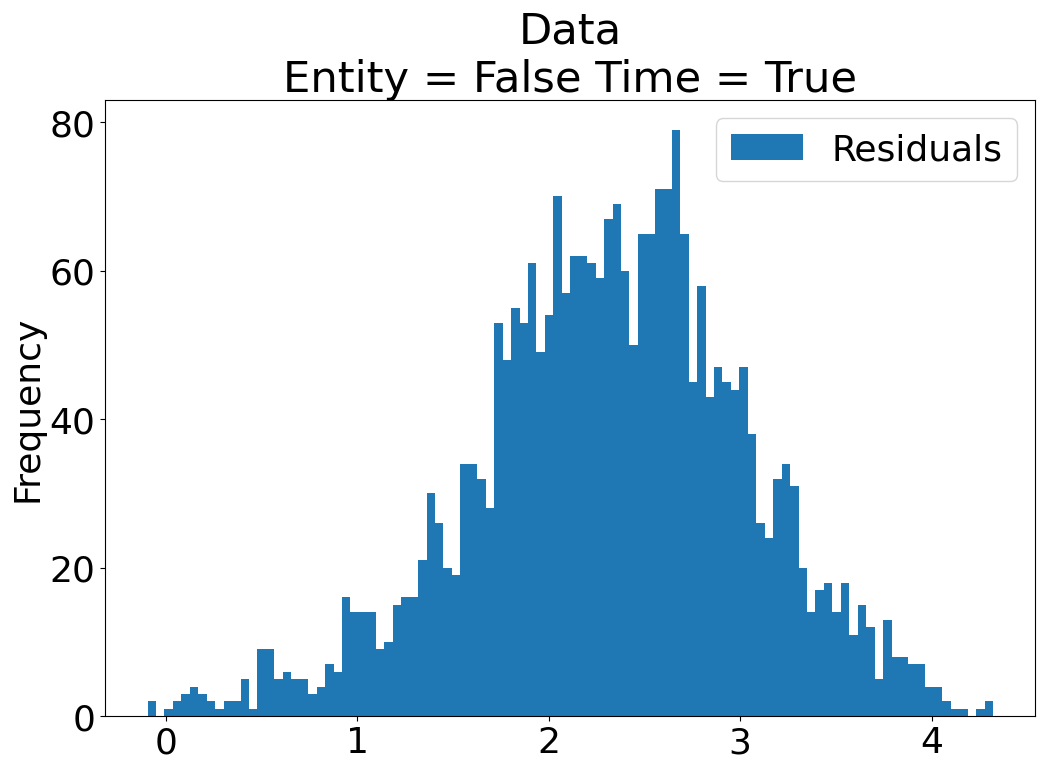

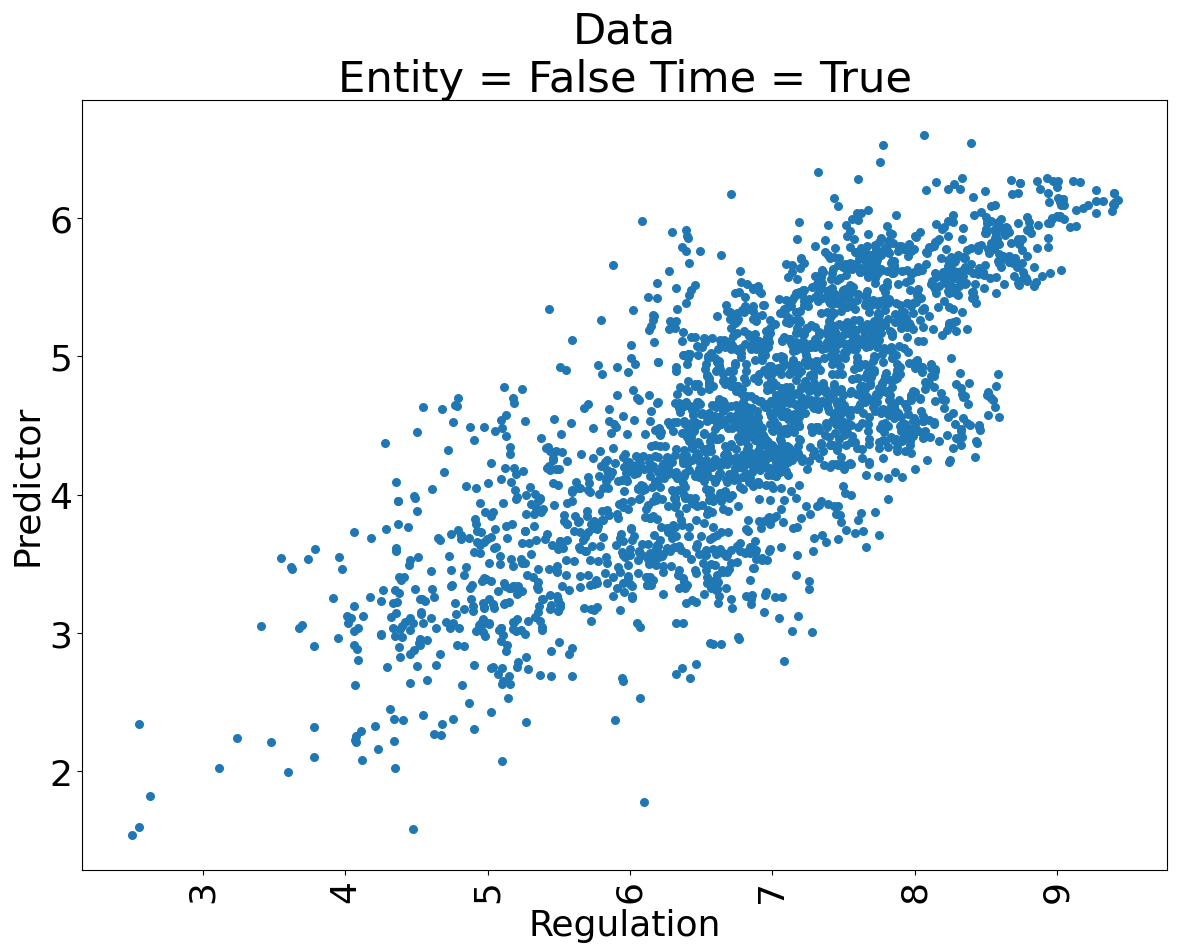

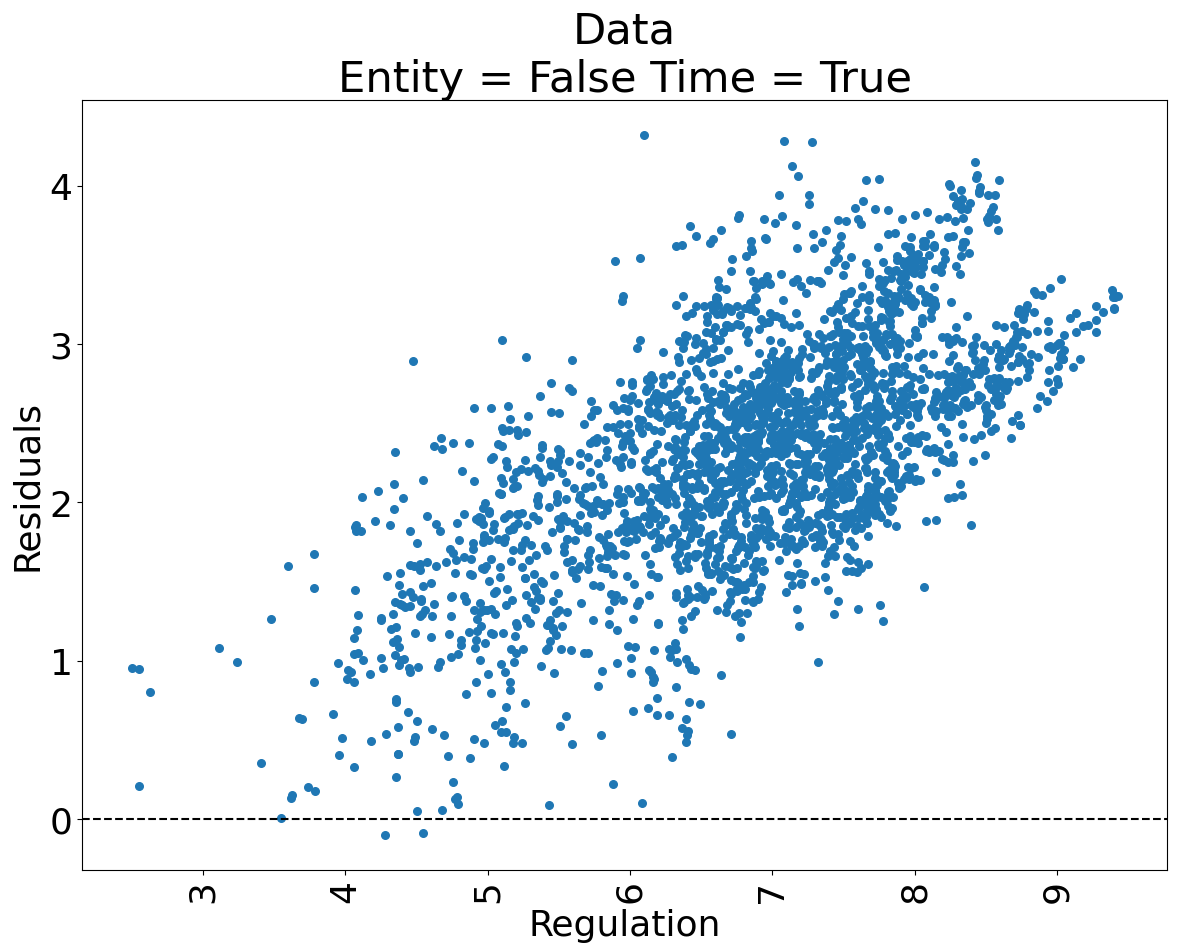

Data
Entity = False
Time = False
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.9876
Estimator:                   PanelOLS   R-squared (Between):              0.9902
No. Observations:                2577   R-squared (Within):               0.0472
Date:                Thu, Apr 25 2024   R-squared (Overall):              0.9876
Time:                        13:58:59   Log-likelihood                   -2990.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   3.424e+04
Entities:                         153   P-value                           0.0000
Avg Obs:                       16.843   Distribution:                  F(6,2571)
Min Obs:                       2.0000                                           
Max Obs:                       19.000   F-statistic (robust):          

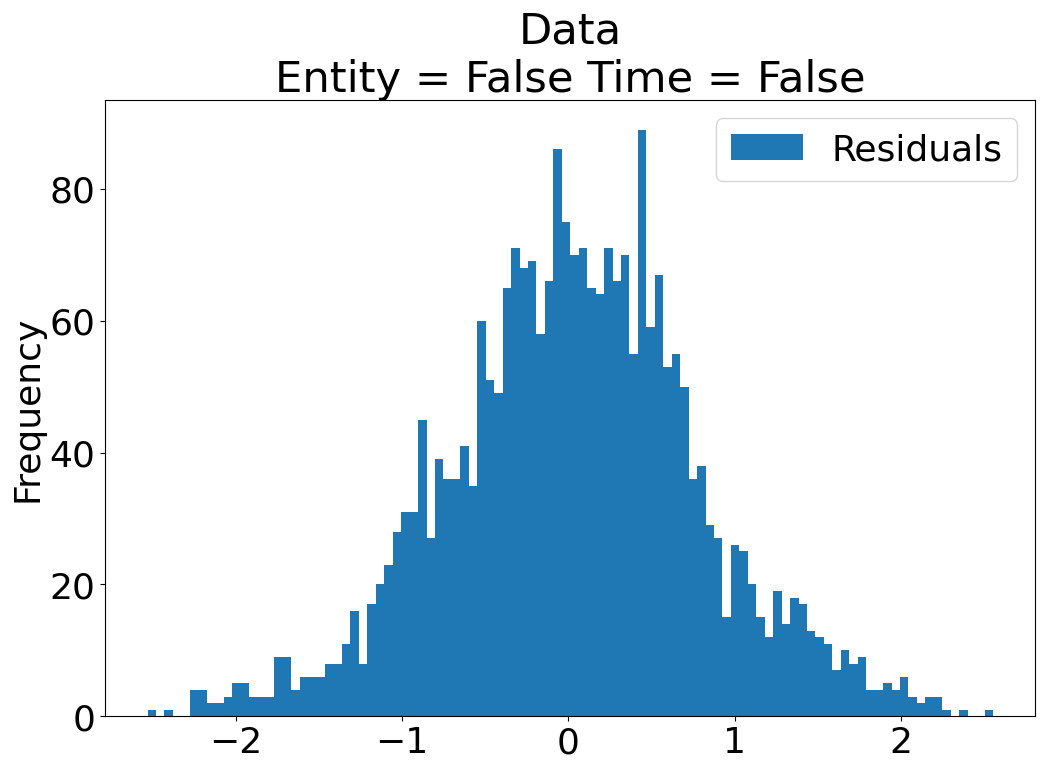

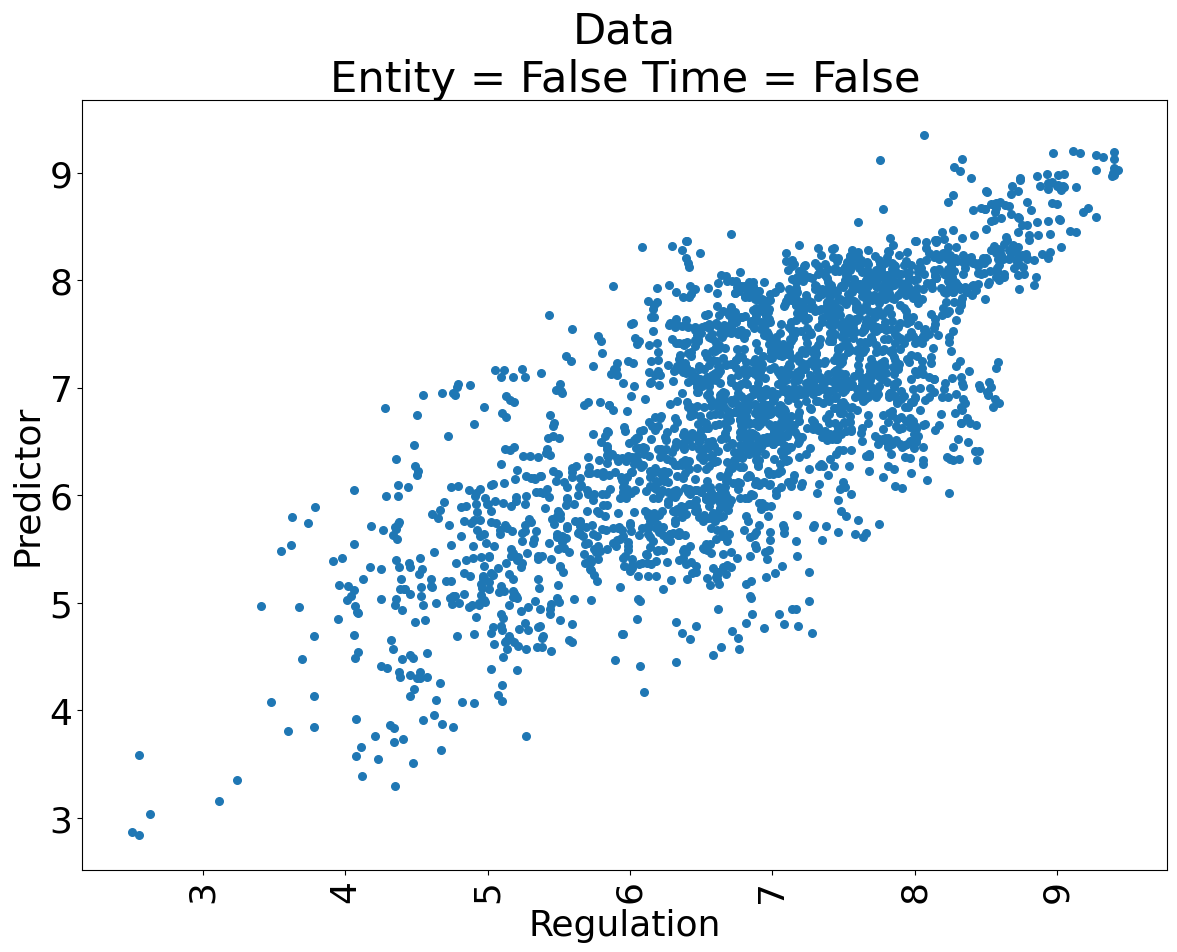

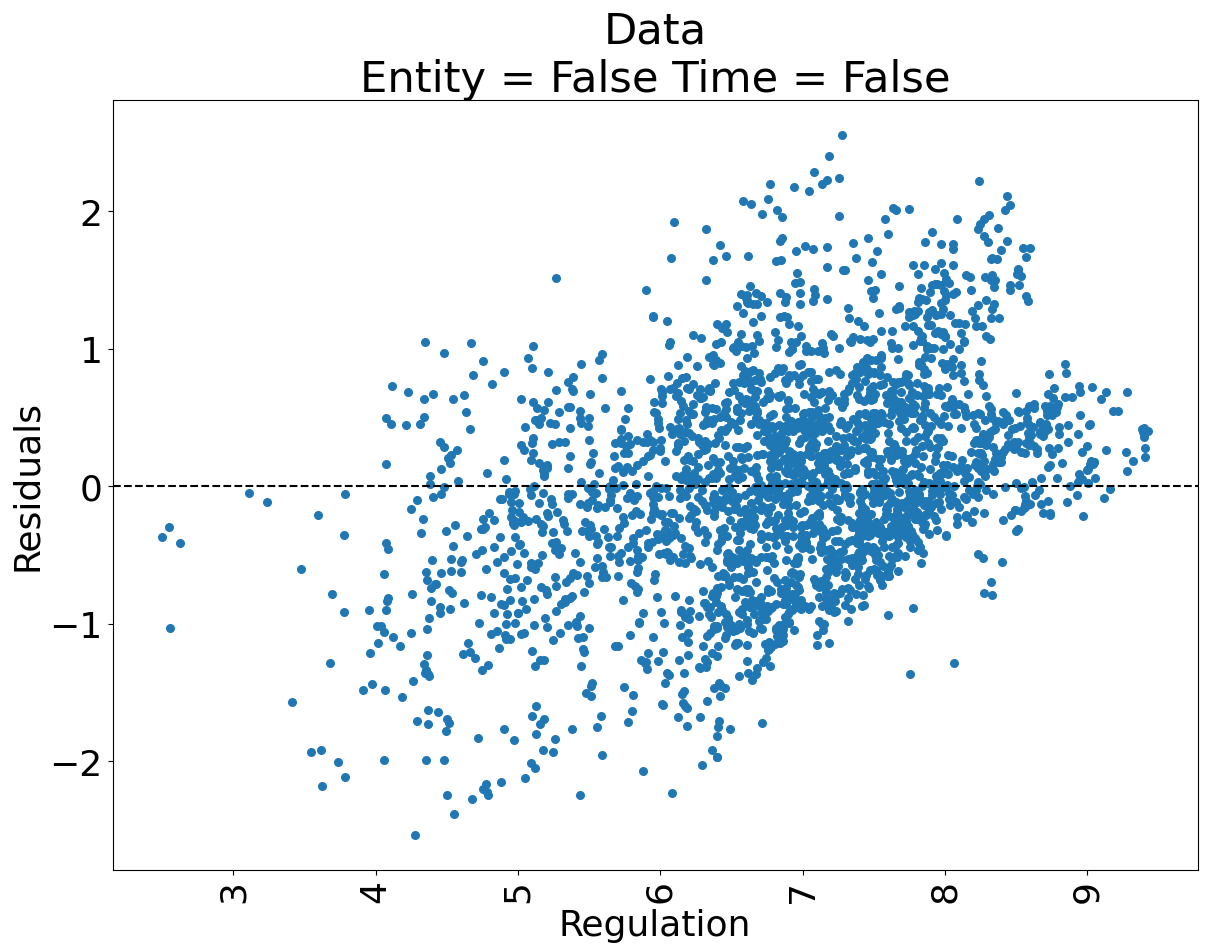

Diff
Entity = True
Time = True
Diff
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.0295
Estimator:                   PanelOLS   R-squared (Between):              0.1139
No. Observations:                2523   R-squared (Within):               0.0564
Date:                Thu, Apr 25 2024   R-squared (Overall):              0.0612
Time:                        13:59:01   Log-likelihood                   -504.89
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      11.892
Entities:                         153   P-value                           0.0000
Avg Obs:                       16.490   Distribution:                  F(6,2346)
Min Obs:                       1.0000                                           
Max Obs:                       19.000   F-statistic (robust):            

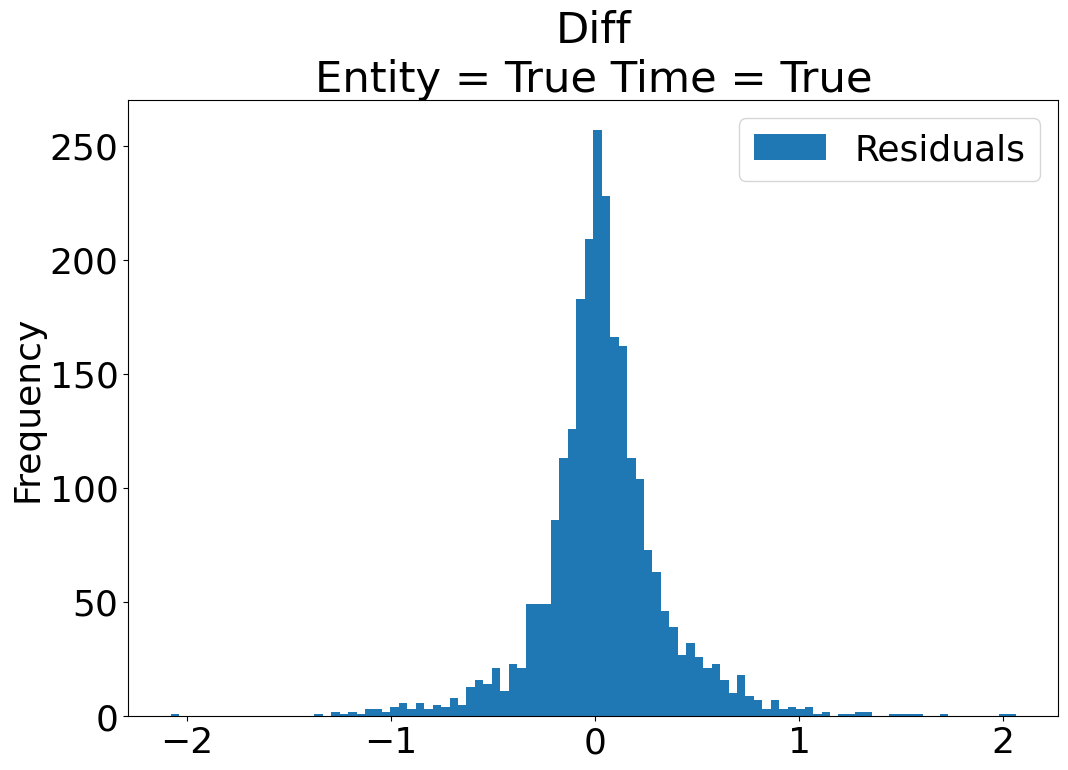

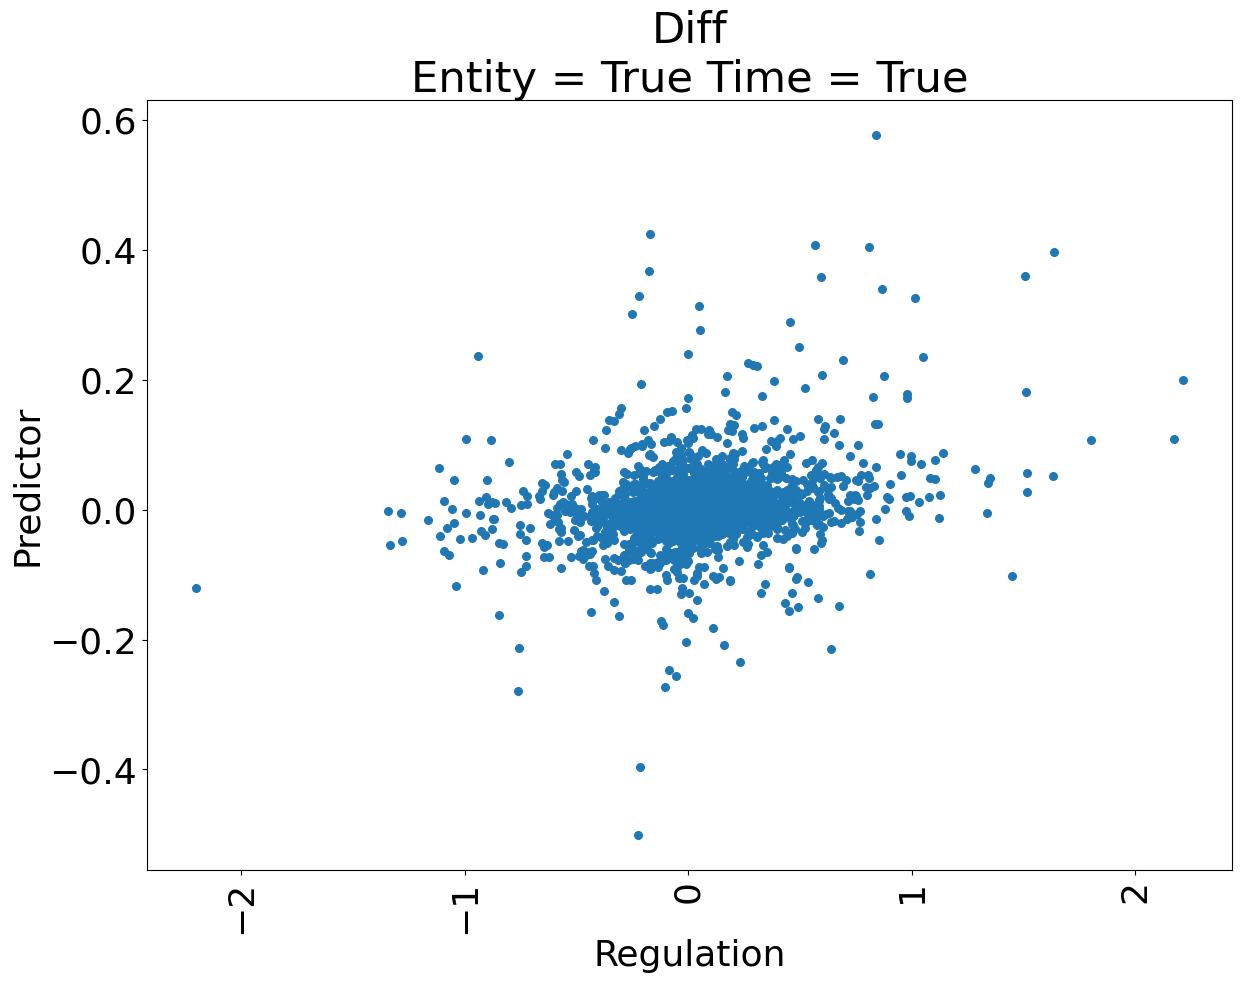

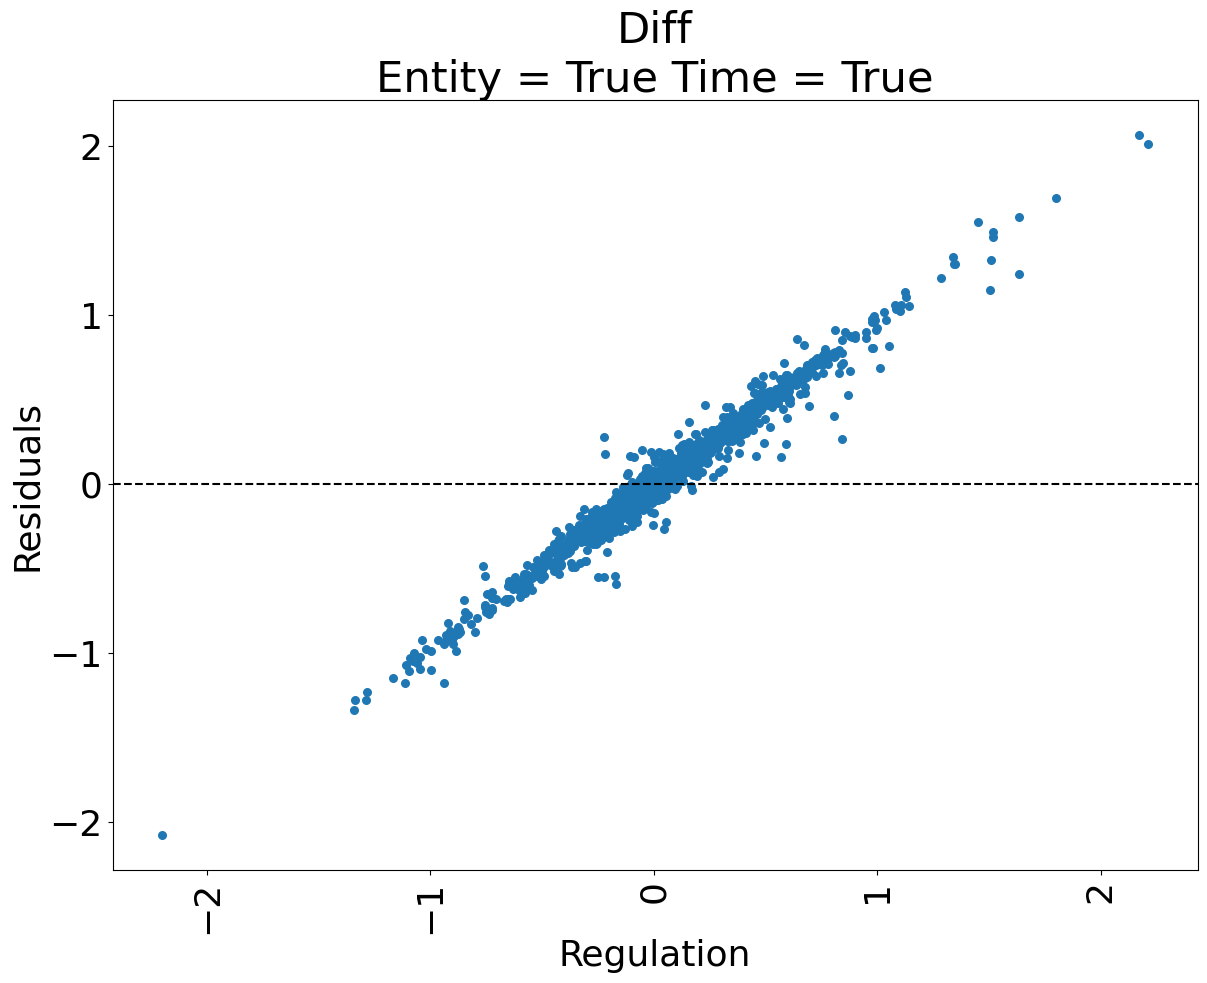

Diff
Entity = True
Time = False
Diff
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.0657
Estimator:                   PanelOLS   R-squared (Between):              0.1229
No. Observations:                2523   R-squared (Within):               0.0657
Date:                Thu, Apr 25 2024   R-squared (Overall):              0.0719
Time:                        13:59:04   Log-likelihood                   -622.50
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      27.697
Entities:                         153   P-value                           0.0000
Avg Obs:                       16.490   Distribution:                  F(6,2364)
Min Obs:                       1.0000                                           
Max Obs:                       19.000   F-statistic (robust):           

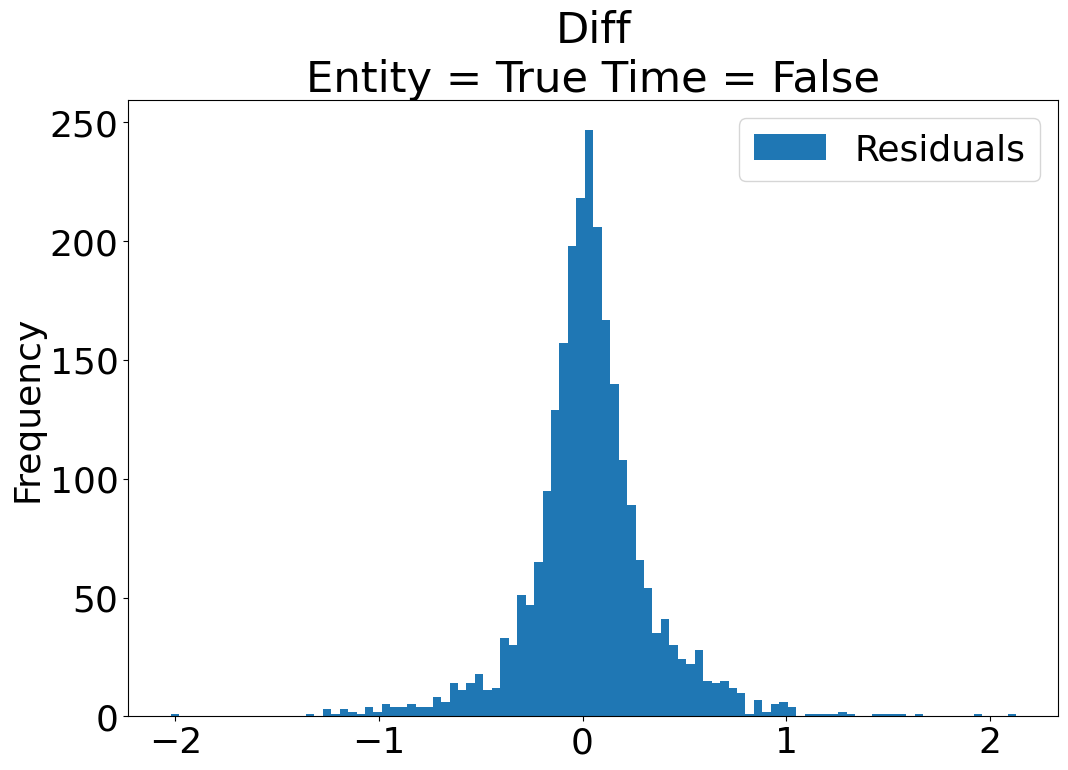

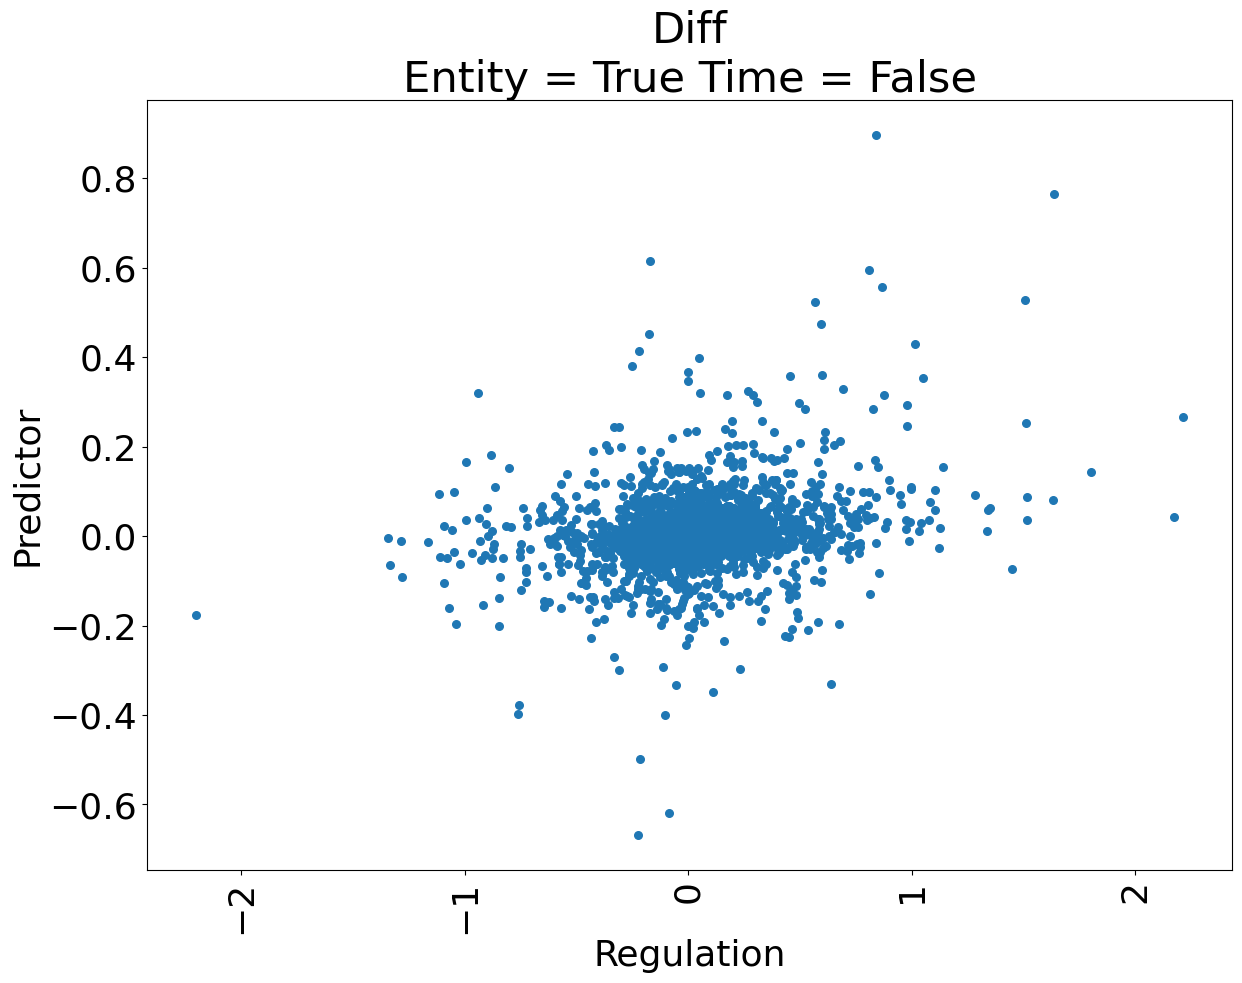

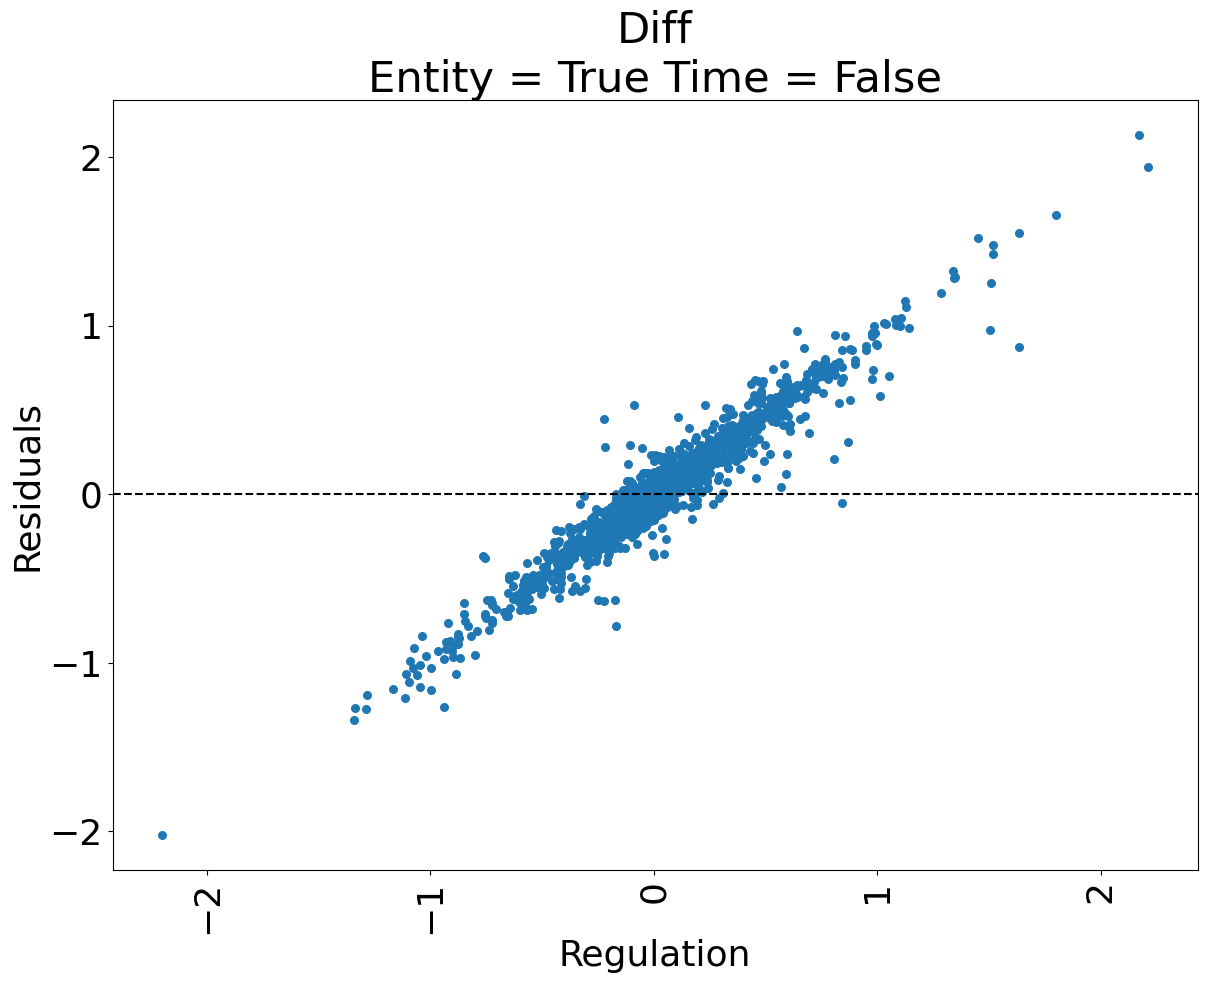

Diff
Entity = False
Time = True
Diff
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.0328
Estimator:                   PanelOLS   R-squared (Between):              0.1289
No. Observations:                2523   R-squared (Within):               0.0572
Date:                Thu, Apr 25 2024   R-squared (Overall):              0.0625
Time:                        13:59:07   Log-likelihood                   -540.96
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      14.135
Entities:                         153   P-value                           0.0000
Avg Obs:                       16.490   Distribution:                  F(6,2498)
Min Obs:                       1.0000                                           
Max Obs:                       19.000   F-statistic (robust):           

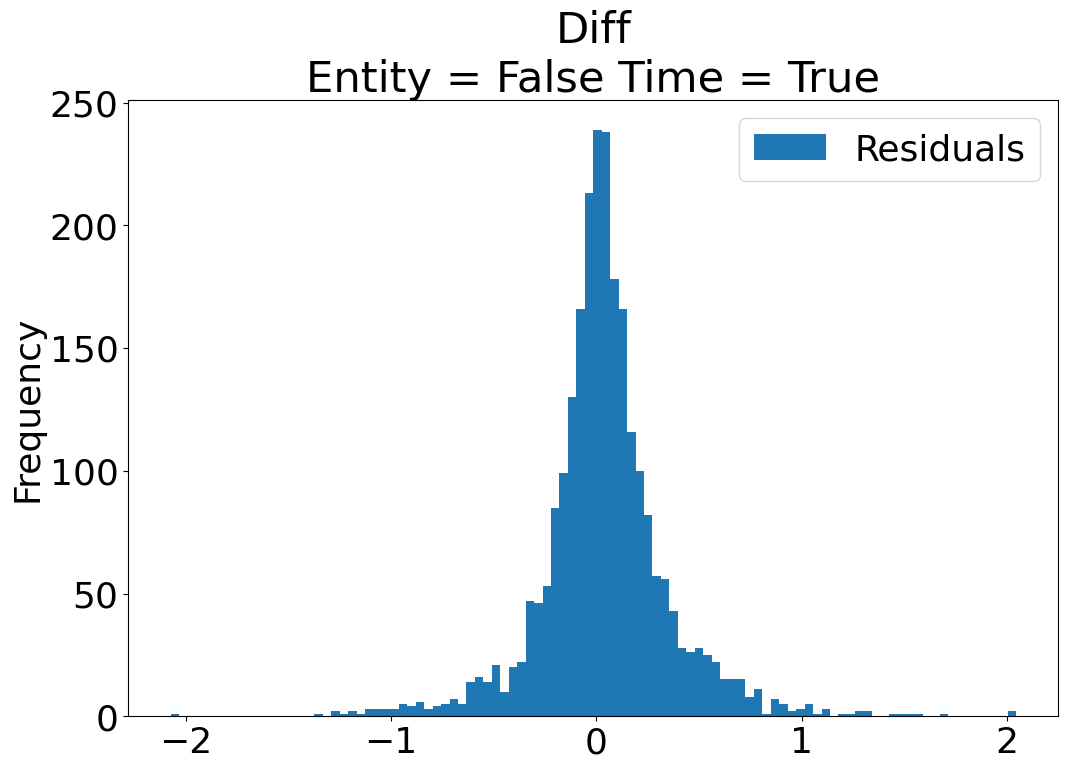

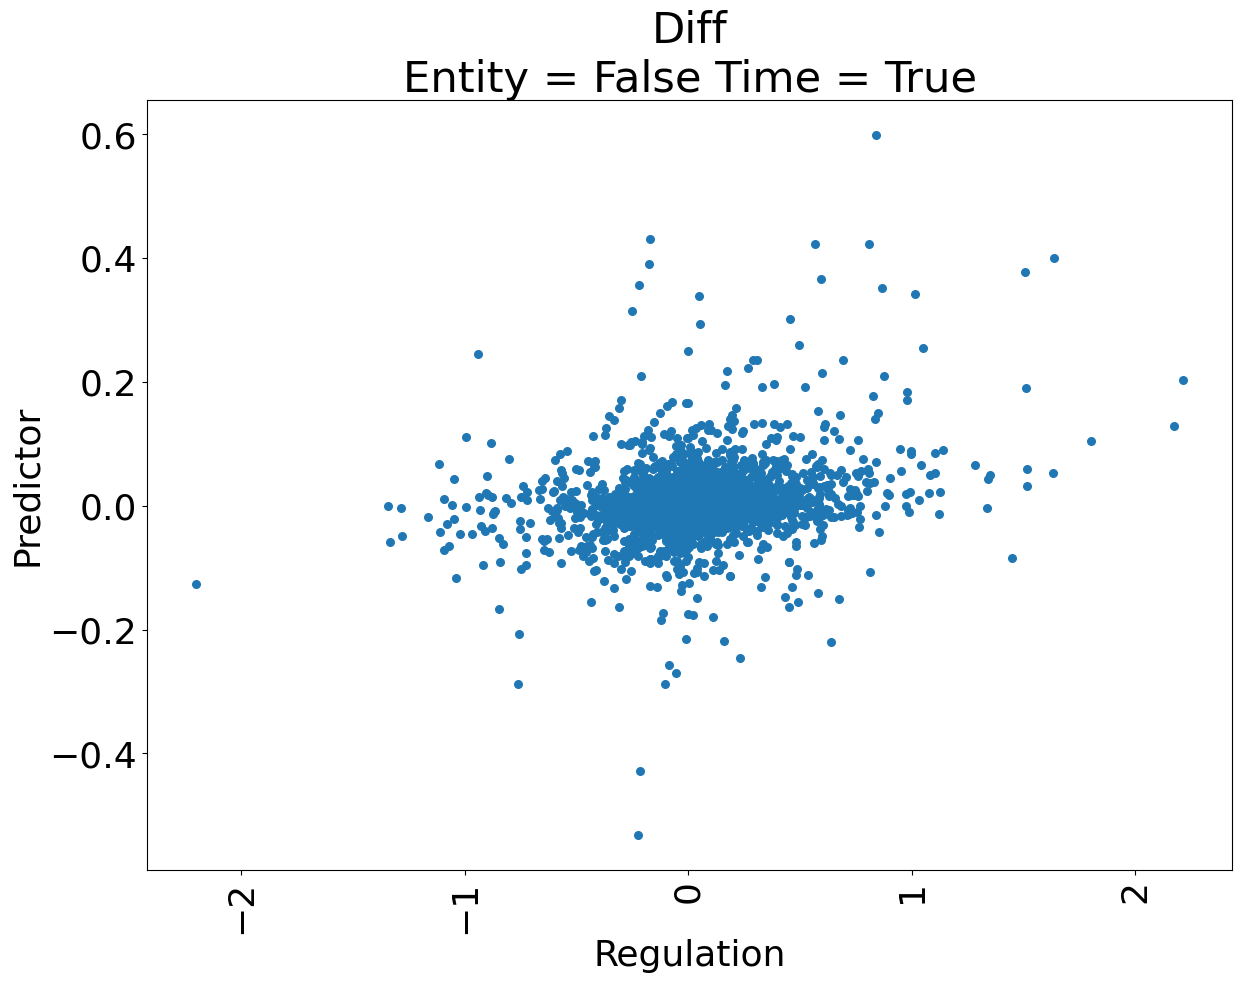

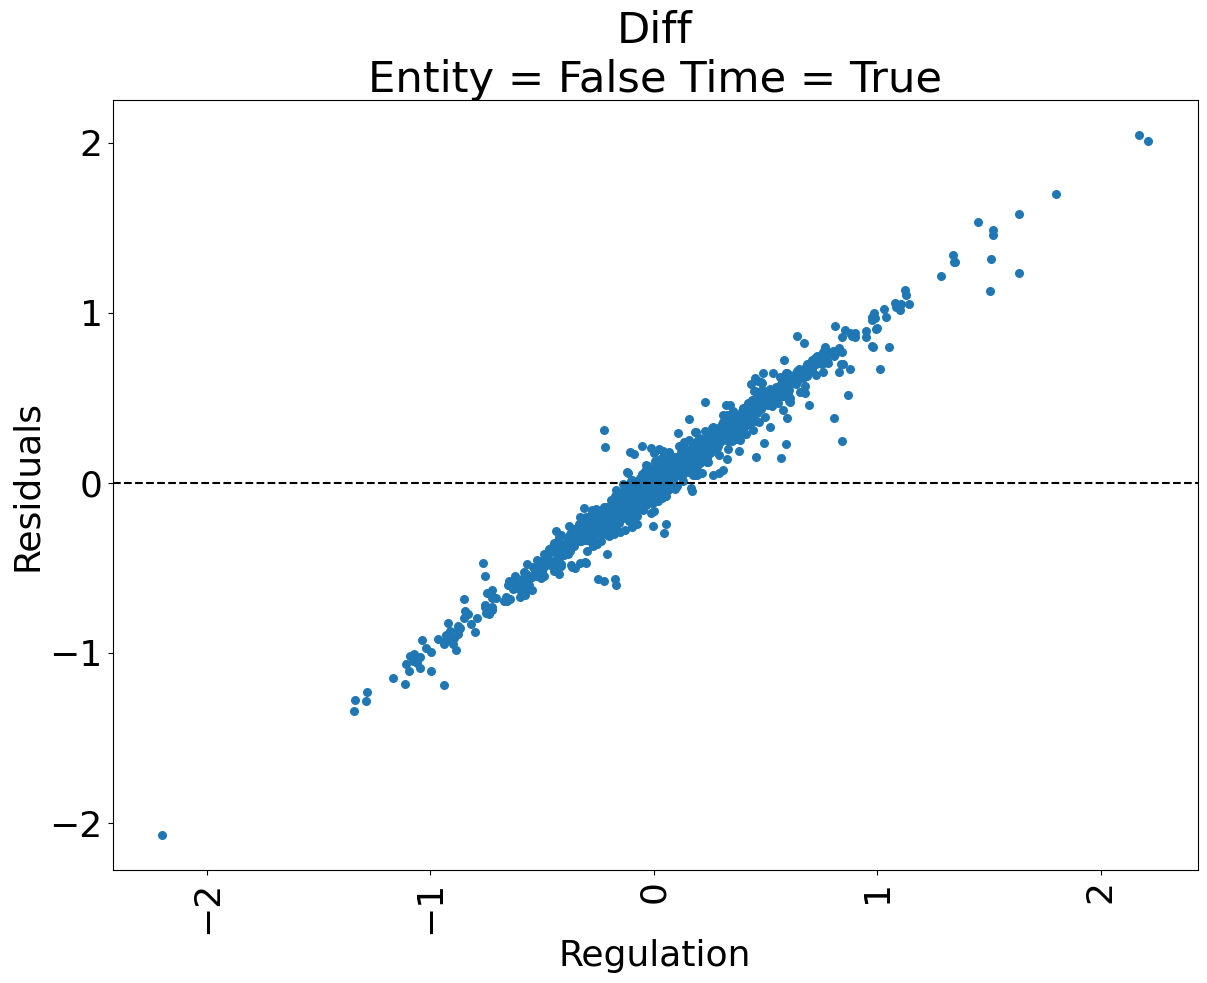

Diff
Entity = False
Time = False
Diff
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.0728
Estimator:                   PanelOLS   R-squared (Between):              0.1536
No. Observations:                2523   R-squared (Within):               0.0648
Date:                Thu, Apr 25 2024   R-squared (Overall):              0.0728
Time:                        13:59:09   Log-likelihood                   -671.87
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      32.939
Entities:                         153   P-value                           0.0000
Avg Obs:                       16.490   Distribution:                  F(6,2517)
Min Obs:                       1.0000                                           
Max Obs:                       19.000   F-statistic (robust):          

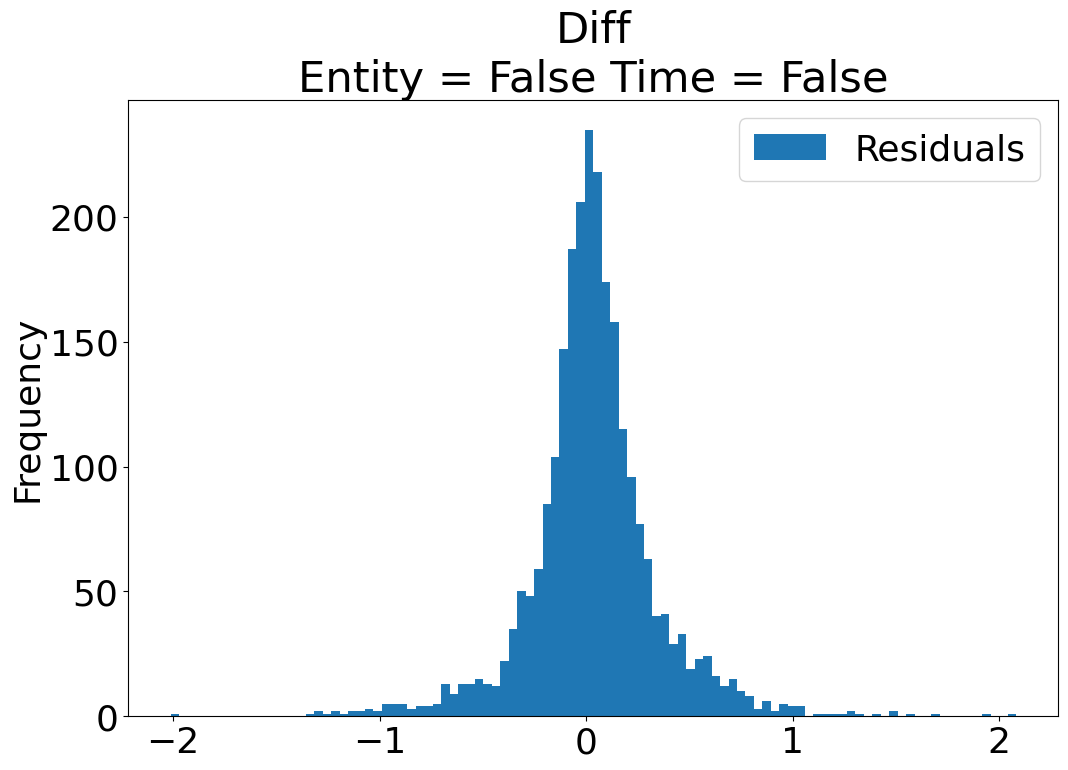

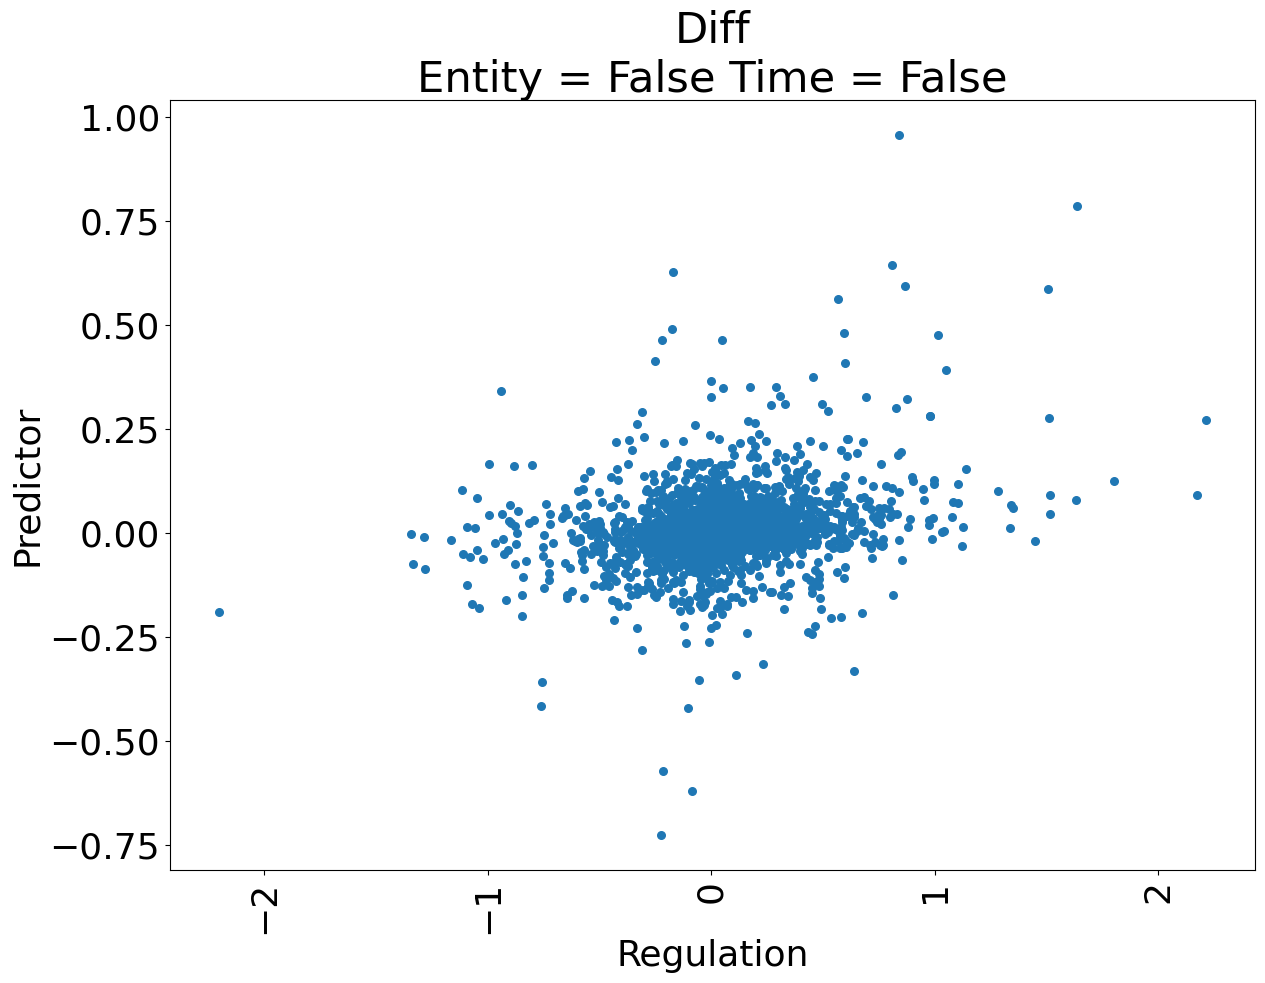

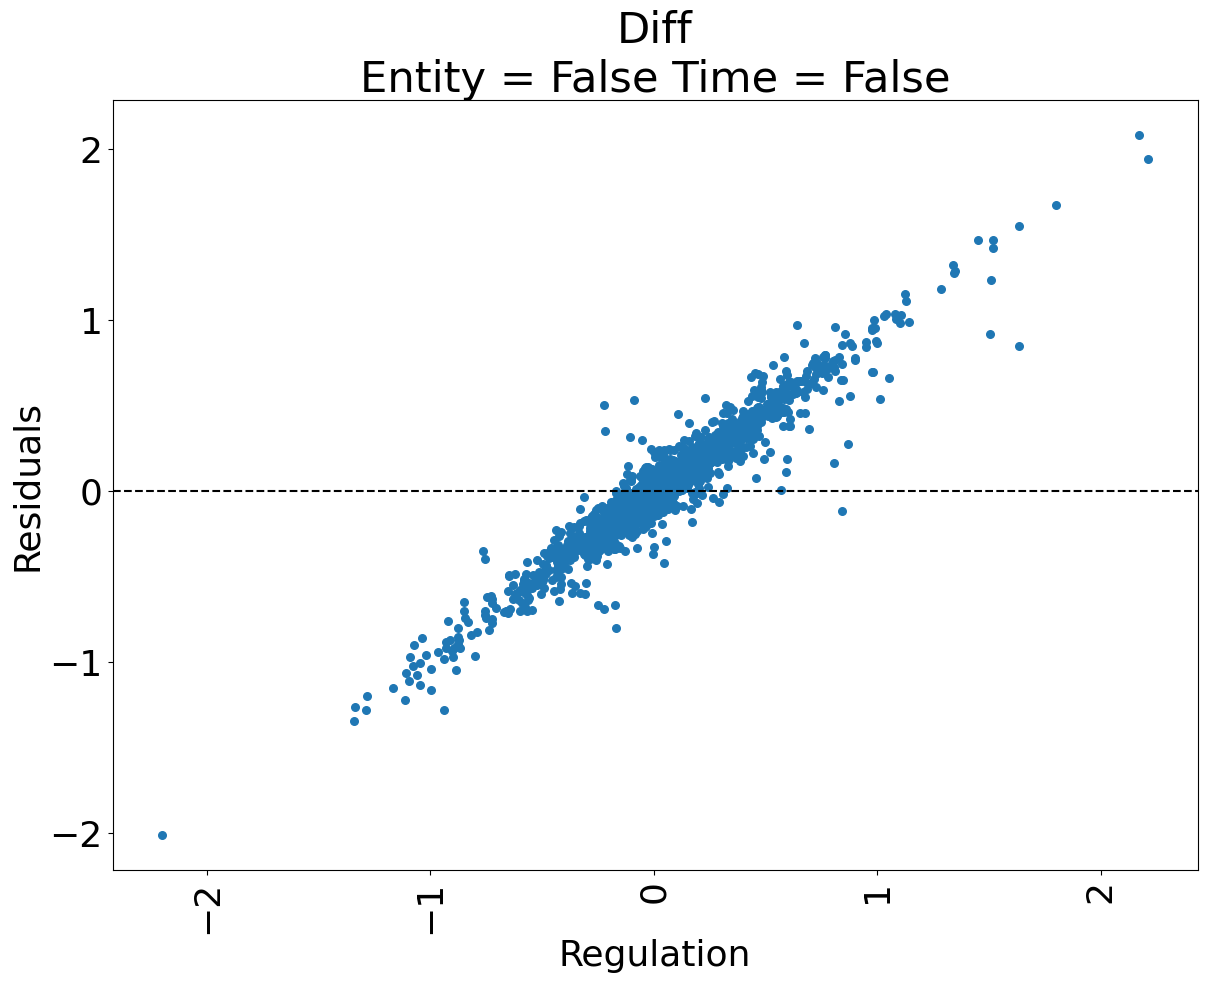

In [29]:
from linearmodels import PanelOLS

y_name = ["Regulation"]
X_names = ["Size of Government", 
          "Legal System and Property Rights", 
          "Sound Money",
          "Freedom to Trade Internationally",
          "RGDP Per Capita", 
          "RGDP Per Capita Lag"]  # Including lagged RGDP per capita

for key, data in data_dict.items():
    for entity in [True, False]:
        for time in [True, False]:
            print(key)
            print("Entity =", entity)
            print("Time =", time)
            reg_data = data_dict[key].dropna()
            Y = reg_data[y_name]
            X = reg_data[X_names]

            # Call panel regression method
            model = PanelOLS(Y, X, entity_effects=entity, time_effects=time)
            results = model.fit(cov_type='clustered', cluster_entity=True)
            print(key, results, sep ="\n") 
            
            # Generate residuals and predictions
            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

            # Plot distribution of residuals
            fig, ax = plt.subplots(figsize=(12, 8))
            reg_data[["Residuals"]].plot.hist(bins=100, ax=ax)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time))

            # Plot observed vs. predicted values
            fig, ax = plt.subplots(figsize=(14, 10))
            reg_data.plot.scatter(x=y_name[0], y="Predictor", s=30, ax=ax)
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time))
            plt.show()
            plt.close()

            # Plot observed against residuals
            fig, ax = plt.subplots(figsize=(14, 10))
            reg_data.plot.scatter(x=y_name[0], y="Residuals", s=30, ax=ax)
            ax.axhline(0, ls="--", color="k")
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time))
            plt.show()
            plt.close()


In this code:

"RGDP Per Capita Lag" had been incorporated into the array of predictor variables (X_names) and the residuals, predicted values, and corresponding plots are produced for further examination.

The inclusion of lagged RGDP per capita as a predictor variable can be evaluated through a comparison of the regression outcomes, residual plots, and goodness-of-fit metrics (e.g., R-squared) before and after its addition. 

If the incorporation of lagged RGDP per capita enhances the model's explanatory capacity and diminishes the correlation between residuals and the dependent variable, it implies that the model captures a greater proportion of the variability in RGDP per capita, leading to improved predictions. 

Conversely, if the impact is insignificant or adverse, it indicates that lagged RGDP per capita may not serve as a substantial predictor in the model.

The inclusion of lagged RGDP per capita as a predictor variable can yield various improved outcomes:

Enhanced Prediction Accuracy

Decrease in Autocorrelation

Alterations in Coefficient Estimates

Influence on Model Interpretation

The implications of including lagged RGDP per capita hinge on the specific dataset and underlying economic dynamics. It is imperative to evaluate the alterations in model fit, coefficient estimates, and residual behavior to comprehend how the inclusion of this variable impacts the overall efficacy and interpretability of the regression model.

### NOTE: 
Since the file was getting too big, many codes in middle are hidden to upload in guithub and only the final plots and code is shown below